### 16.2 - Tutorial - Diferencias finitas para conducción de calor no estacionaria

Se desea conocer el perfil de temperatura en una barra de aluminio de ancho y largo semi-infinitos y espesor $W = 1 m$. 

Un extremo de la barra se mantiene a temperatura $T_1 = 280 K$, que corresponde a la temperatura de toda la barra al inicio del proceso de interés $t=0$.

En el instante $t=0$, el otro extremo de la barra se eleva súbitamente a una temperatura $T_2 = 380 K$. 

La difusividad térmica de la barra es 9.586 $\times$ $10^{-5}$ m s$^{-2}$.

El balance diferencial de este sistema produce la siguiente ecuación diferencial parcial

$$ \frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial z^2} $$

1. Discretice la ecuación diferencial resultante utilizando diferencias finitas en el espacio y el tiempo 
2. Implemente un algoritmo numérico para encontrar la solución al sistema durante los primeros 3600 segundos de proceso.

### Parte 1)

Utilizaremos en primer lugar el método de Euler hacia adelante para la discretización de la derivada temporal. Sean $t$ y $t+1$ el tiempo de la iteración actual y el tiempo de la próxima iteración, respectivamente. Estos aparecerán en superíndices al lado de la variable discretizada. En los subíndices aparecerán los índices asociados a los nodos provenientes de la discretización espacial del dominio geométrico. 

$$ \frac{T_i^{t+1}-T_i^{t}}{\Delta t} = \alpha \frac{T_{i+1}^t - 2 T_{i}^t + T_{i-1}^t}{\Delta z ^2} $$

$$ T_i^{t+1} = T_i^{t} + \alpha \Delta t \frac{T_{i+1}^t - 2 T_{i}^t + T_{i-1}^t}{\Delta z ^2} $$

### Parte 2)

In [17]:
# Computación científica
import numpy as np

# Gráficos
import matplotlib.pyplot as plt

# Mapas de colores
from matplotlib import cm

# Funciones especiales
from scipy.special import erf, erfc

In [18]:
# Condiciones de borde del problema

T_init = 280 # K
T_a = 380 # K
T_b = 280 # K

In [19]:
# Número de nodos en la dimensión z
n_z = 101

# Espesor de la barra
W = 1 #m

# Propiedades fisicas
alpha = 9.586e-5 # m^2/s

# Intervalo de escritura de tiempo
writeInterval = 1

dt = 0.1 # s

# Inicializar el reticulado (mesh)
z = np.linspace(0, W, n_z+1)

# Espaciamiento del reticulado
dz = W/(n_z - 1)

# Condición inicial
T = np.ones(n_z + 1) * T_init

# Tiempo inicial
t_0 = 0

# Tiempo final
t_f = 3600 # s

### Condiciones de borde

$T(z=0) = T_1 = 280 K$

$T(z=1) = T_2 = 380 K$

In [20]:
T[0] = T_a
T[-1] = T_b

In [21]:
# Tiempos que nos interesan para comparar con la solución semi-infinita
# Los otros dos tiempos se agregan de modo de encontrar
# El perfil en estado estacionario

t_span = [25, 104, 235, 417, 652, 1800, 3600]

Recordamos la discretización:

$$ \frac{T_i^{t+1}-T_i^{t}}{\Delta t} = \alpha \frac{T_{i+1}^t - 2 T_{i}^t + T_{i-1}^t}{\Delta z ^2} $$

$$ T_i^{t+1} = T_i^{t} + \alpha \Delta t \frac{T_{i+1}^t - 2 T_{i}^t + T_{i-1}^t}{\Delta z ^2} $$

In [26]:
# Lista de vectores temperatura que seran almacenados.
T_out = []
T_out.append(T)
t = t_0

# Índice de tiempo

idx = 0
while t < t_f:
    T_old = np.copy(T)
    
    # Solamente actualizamos los nodos interiores
    for i in range(1,n_z):
        T[i] = T_old[i] + alpha*dt/dz**2 * (T_old[i+1]-2*T_old[i] + T_old[i-1])
    t += dt # t = t + dt
    
    # El siguiente cómodo asegura almacenar
    # únicamente aquellos tiempos de interés
    # en la lista t_span con el objetivo de minimizar
    # el uso de memoria
    if(t % t_span[idx] < dt):
        T_out.append(T_old)
        if idx <= (len(t_span)-2):
            idx += 1
        print(idx)


1
2
3
4
5
6
6


In [27]:
T_out

[array([380.        , 378.93966039, 377.87938875, 376.81925296,
        375.7593208 , 374.69965983, 373.64033736, 372.58142036,
        371.52297543, 370.46506868, 369.40776573, 368.3511316 ,
        367.29523066, 366.24012659, 365.18588227, 364.13255977,
        363.08022025, 362.02892395, 360.97873006, 359.92969673,
        358.88188098, 357.83533865, 356.79012434, 355.74629138,
        354.70389175, 353.66297606, 352.62359346, 351.58579164,
        350.54961674, 349.51511333, 348.48232438, 347.45129118,
        346.42205332, 345.39464868, 344.36911333, 343.34548156,
        342.3237858 , 341.3040566 , 340.28632264, 339.27061065,
        338.25694538, 337.24534964, 336.23584421, 335.22844786,
        334.22317732, 333.22004726, 332.21907027, 331.22025687,
        330.22361547, 329.22915242, 328.2368719 , 327.24677603,
        326.25886479, 325.27313607, 324.28958561, 323.30820708,
        322.32899203, 321.35192992, 320.37700813, 319.40421198,
        318.43352471, 317.46492754, 316.

Perfil de temperatura analítico para conducció unidimensional en medio semi-infinito.

$$ T = (T_1-T_0) \times \left[1-\mathrm{erf} \left( \frac{z}{\sqrt{4 \alpha t}} \right) \right] + T_0 $$

In [29]:
# Definimos la función del perfil dimensional de temperatura
def T_semi_infinite(z, t, alpha, T_0, T_1):
    T = (T_1-T_0) * (1-erf(z/np.sqrt(4*alpha*t))) + T_0
    return T

### Rutina para graficar

<Figure size 432x432 with 0 Axes>

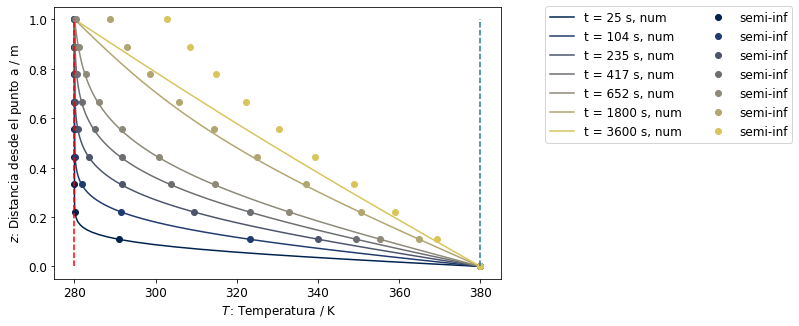

In [32]:
# Utilizar paleta de colores inclusiva
cividis = cm.get_cmap("cividis", 8)
colours = [cividis(0), cividis(1 / 7), cividis(2 / 7), cividis(3 / 7), cividis(4 / 7), cividis(5 / 7), cividis(6 / 7), cividis(1)]

plt.figure(figsize = [6,6])
# plt.plot(z,T_out[0], label= 't = %.0f s ' % 0)

# Gráfico solución numérica
plt.figure(figsize=[8,5])


for idx in range(1,len(T_out)):
    # Minutos
    # plt.plot(T_out[idx], y, label = 't = %.0f min ' % (writeInterval*idx/60) )
    plt.plot(T_out[idx], z, color=colours[idx-1], label = 't = %.0f s, num' % t_span[idx-1])


# Gráfico solución analítica
z_an = np.linspace(0,W,10)
for i in range(0,len(t_span)):
    temp_analytical_t1 = T_semi_infinite(z_an, t_span[i], alpha, T_b, T_a)
    plt.plot(temp_analytical_t1,  z_an, color=colours[i], marker='o', ls='',
             label = "semi-inf")
    
plt.legend(fontsize = 12)
plt.ylabel('$z$: Distancia desde el punto a / m', size = 12)
plt.xlabel(' $T$: Temperatura / K', size = 12)
plt.tick_params(labelsize = 12)

plt.tick_params(labelsize=12)
plt.vlines(x=T_a, ymin=0, ymax=1, ls='--')
plt.vlines(x=T_b, ymin=0, ymax=1, ls='--', color='r')
plt.legend(loc=[1.1,0.5], fontsize=12, ncol=2)

plt.savefig('fig7_numerical_semi_infty.svg', bbox_inches='tight', transparent=True)
plt.show()